In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

In [3]:
#32-bit floating-point [-1.0,+1.0] np.float32
#from scipy.io.wavfile import write
#write('test.wav', int(fs), np.real(chirp).astype(np.float32))

In [4]:
original_chirp_filename='test.wav'
(original_chirps_fs, original_chirp_data)=wavfile.read(original_chirp_filename)
original_chirp_data.shape

(44100,)

In [5]:
collect_filename='test_amber_front_20ft.wav'
collect_filename='house_bose_front_20ft.wav'
(collect_fs, collect_data)=wavfile.read(collect_filename)
collect_data.shape

(1652001, 2)

In [6]:
chirp_corr=np.correlate(original_chirp_data, collect_data[:,0])

In [7]:
chirp_corr.shape[0]

1607902

In [8]:
#For normalized cross correlation compute the energy a each position
segment_length=original_chirp_data.shape[0]
energy_level=np.zeros((collect_data.shape[0]-segment_length,1))
for ii in np.arange(0,energy_level.shape[0]):
    energy_level[ii,0]=np.sum(np.absolute(collect_data[ii:(ii+segment_length-1),0]))
    

In [9]:
T_F=61
target_distance_feet=20

T_C=(T_F-32)*5/9;
speed_of_sound_in_air_m_per_sec=331+0.6*T_C
meter_to_feet=3.281;
target_distance_m=target_distance_feet/meter_to_feet;
round_trip_distance_m=2*target_distance_m;

t_sec=np.arange(0,chirp_corr.shape[0],1)/collect_fs
d_m=speed_of_sound_in_air_m_per_sec*t_sec;

1607902

In [10]:
chirp_corr=np.correlate(original_chirp_data, collect_data[:,0])

In [19]:
print(repr(np.squeeze(chirp_corr[0:1607901]).shape))
print(repr(np.squeeze(energy_level[0:1607901]).shape))


(1607901,)
(1607901,)


<IPython.core.display.Javascript object>


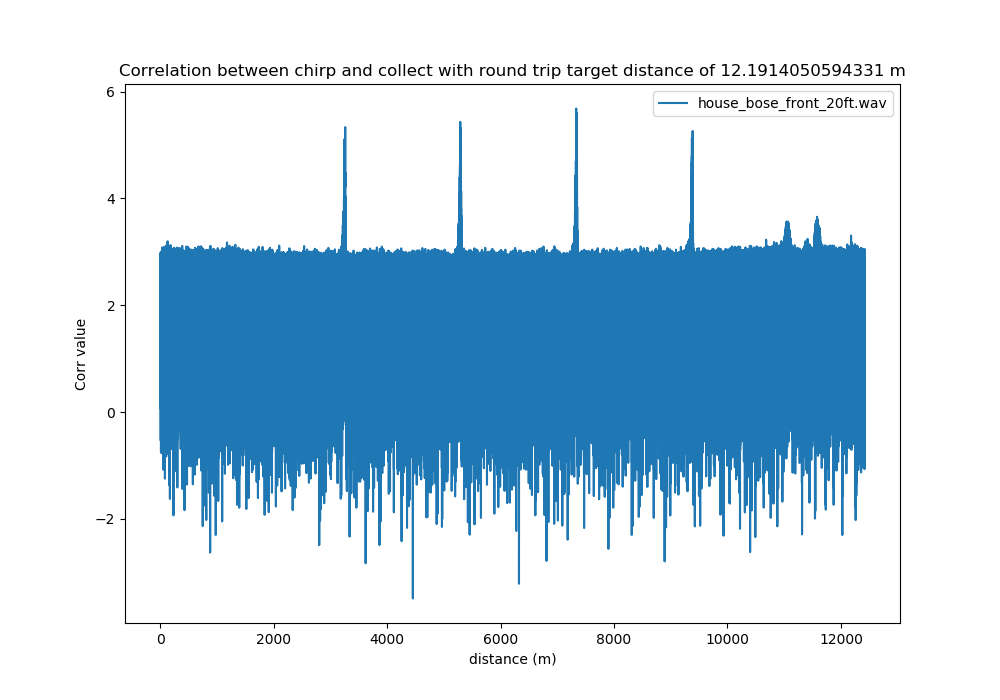

Text(0.5, 1.0, 'Correlation between chirp and collect with round trip target distance of 12.1914050594331 m')

In [26]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(d_m[0:-1],np.log10(np.abs(np.squeeze(chirp_corr[0:1607901]))),label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('Corr value')
plt.legend()
plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m} m')

<IPython.core.display.Javascript object>


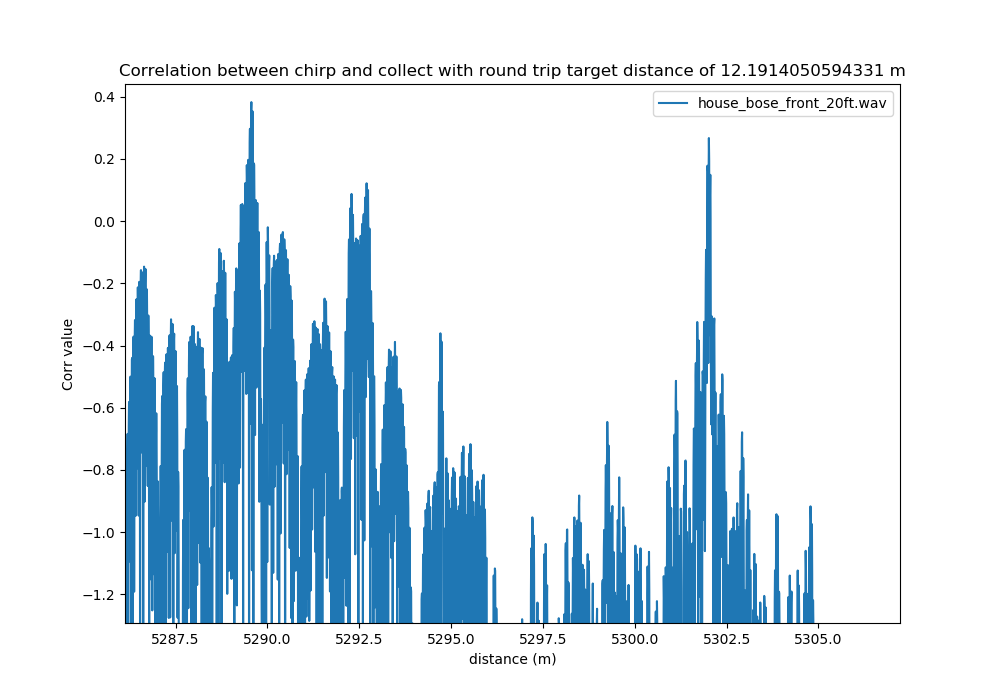

Text(0.5, 1.0, 'Correlation between chirp and collect with round trip target distance of 12.1914050594331 m')

In [30]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(d_m[0:-1],np.log10(np.abs((np.divide(np.squeeze(chirp_corr[0:1607901]),np.squeeze(energy_level[0:1607901]))))),label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('Corr value')
plt.legend()
plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m} m')

In [ ]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(d_m,chirp_corr,label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('Corr value')
plt.legend()
plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m} m')

In [ ]:
NFFT = 512  # the length of the windowing segments
Fs = collect_fs  # the sampling frequency

t_sec=np.arange(0,collect_data.shape[0],1)/collect_fs
d_m=speed_of_sound_in_air_m_per_sec*t_sec;

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
ax1.plot(d_m, collect_data[:,0])
Pxx, freqs, bins, im = ax2.specgram(collect_data[:,0], NFFT=NFFT, Fs=Fs, noverlap=500)
ax3.plot( np.arange(0,chirp_corr.shape[0],1)/collect_fs,chirp_corr)

plt.show()

